# **СИИ lab1**

ФИО: Чэнь Жохань

ИСУ: 413107

## Линейная и логистическая регрессия

### 0. import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

### 1. Датасет

#### 1.1 Датасет домы Калифония

In [5]:
data_house = pd.read_csv('California_Houses.csv')
data_house.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [6]:
print('Строки и столбики:', data_house.shape)
data_house.info()

Строки и столбики: (20640, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  2064

In [7]:
data_house.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


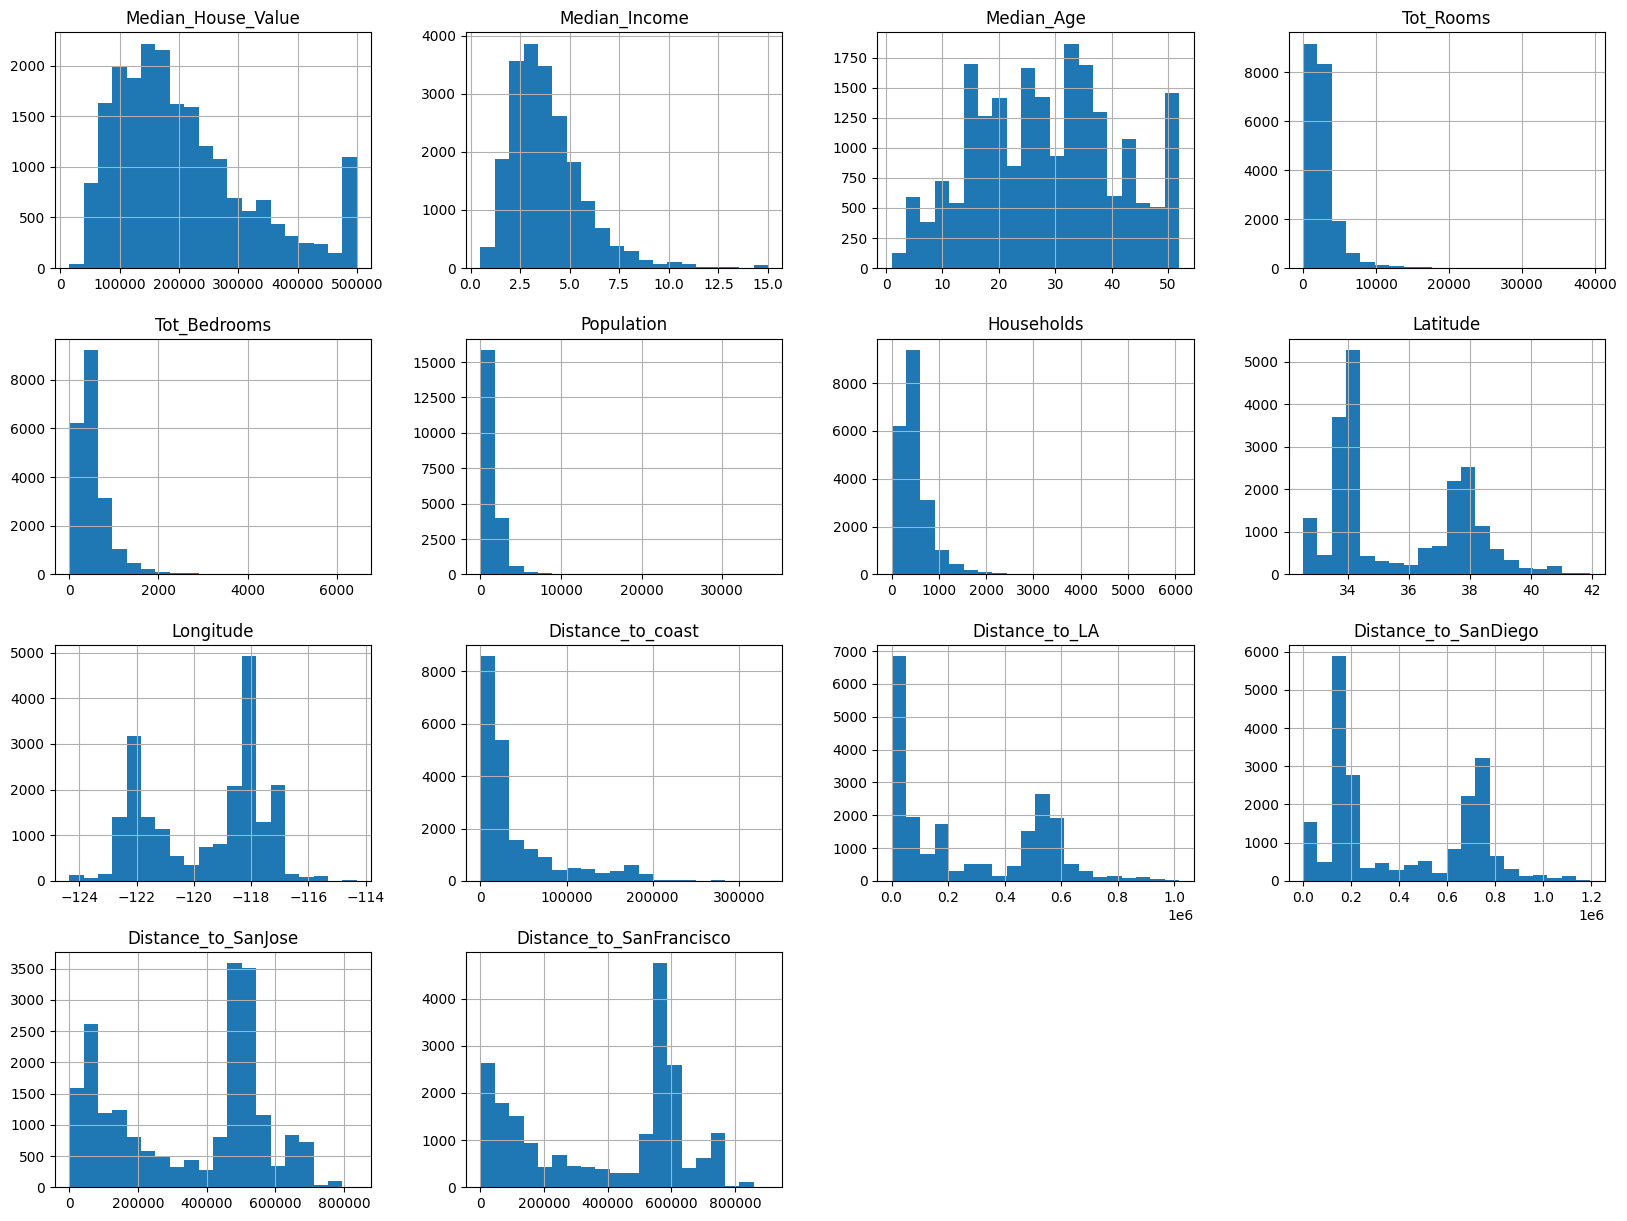

In [8]:
data_house.hist(bins=20, figsize=(20, 15))
plt.show()

#### 1.2 Датасет Титаник

In [9]:
data_titanic = pd.read_csv('Titanic-Dataset.csv')
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print('Строки и столбики:', data_titanic.shape)
data_titanic.info()

Строки и столбики: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


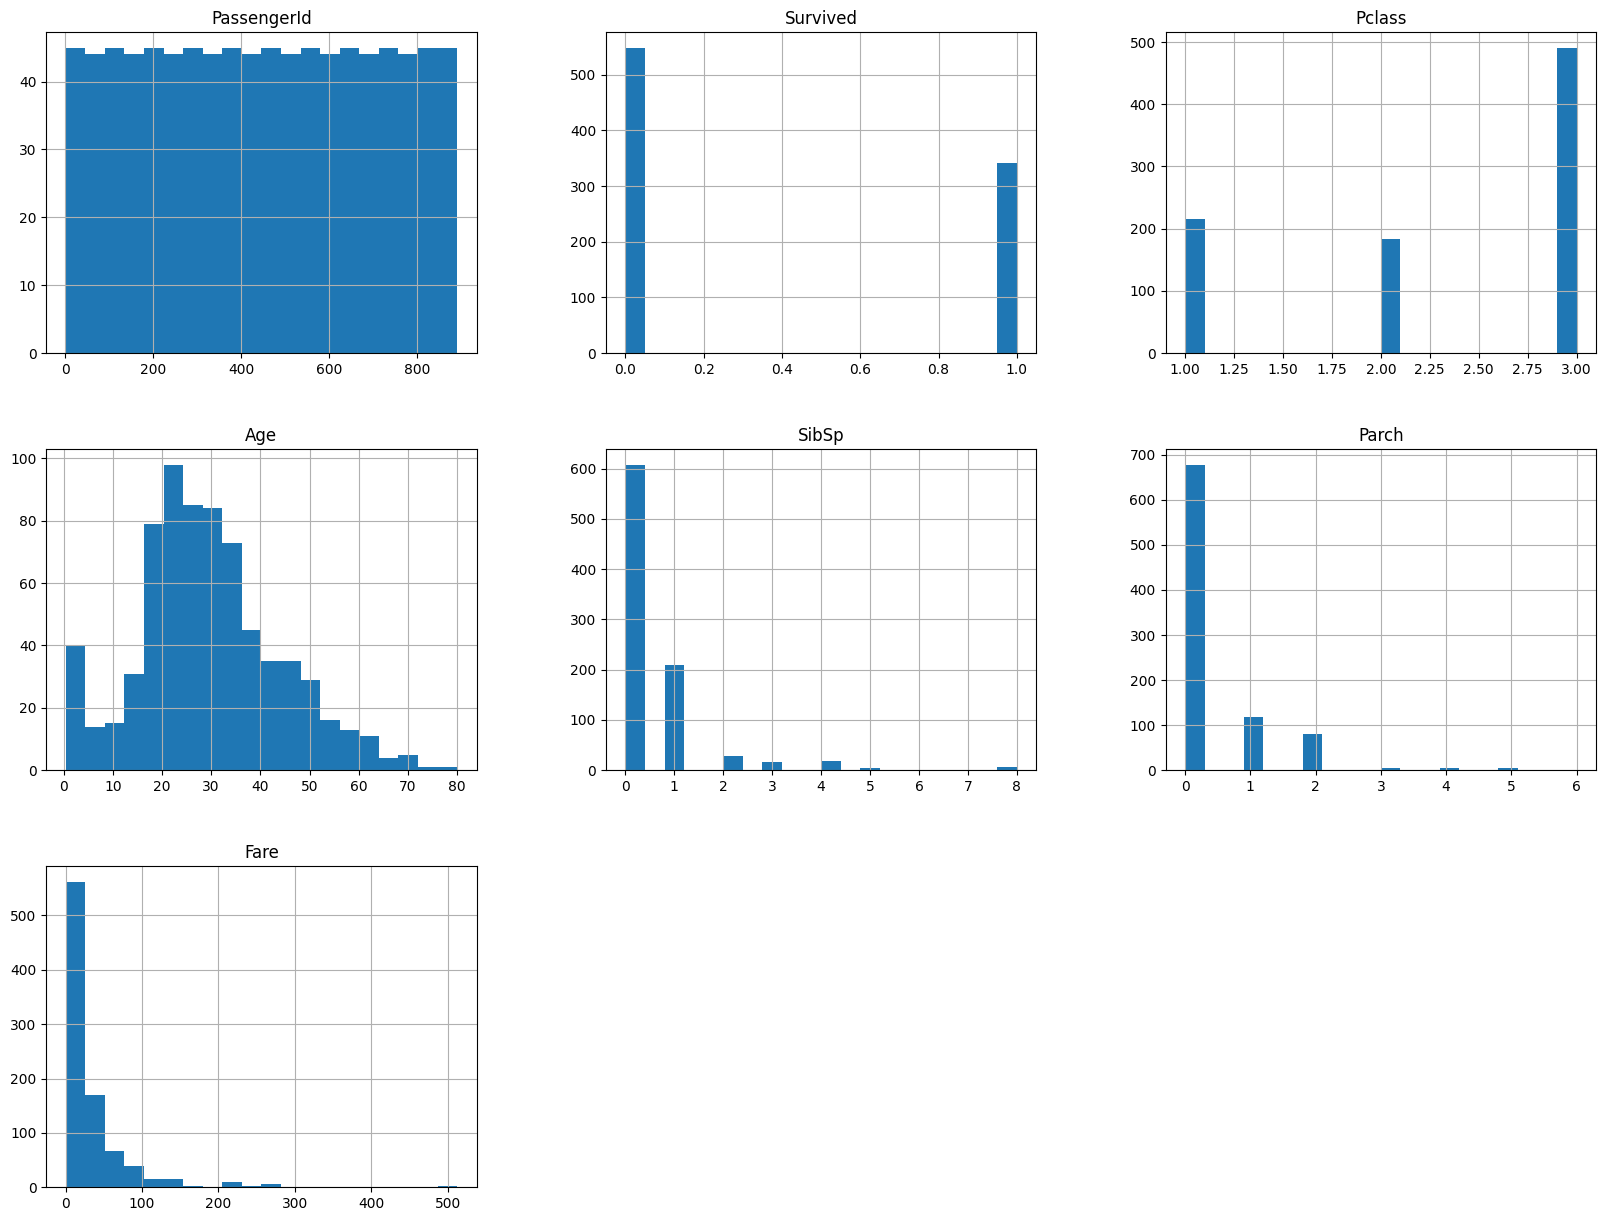

In [12]:
data_titanic.hist(bins=20, figsize=(20, 15))
plt.show()

### 2. Предварительная обработка данных

Функция для того, чтобы рисовать зависимость матрицы:

In [13]:
plt.style.use('default')

def correlation_matrix(table):
    
    numeric_cols = table.select_dtypes(include=[np.number]).columns
    corr_matrix = table[numeric_cols].corr().values

    plt.figure(figsize=(14, 10))
    
    im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(im, label='Correlation коэф.')
    
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            plt.text(j, i, f'{corr_matrix[i, j]:.2f}', 
                    ha='center', va='center', 
                    color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')
    
    plt.title('Correlation matrix')
    plt.tight_layout()
    plt.show()

#### 2.1 пустое значение

Если есть пустые значение, либо удалить строки, либо ставить среднее значение или значание медианы.

Для домы Калифония

In [14]:
data_house.isnull().any(axis=0)

Median_House_Value          False
Median_Income               False
Median_Age                  False
Tot_Rooms                   False
Tot_Bedrooms                False
Population                  False
Households                  False
Latitude                    False
Longitude                   False
Distance_to_coast           False
Distance_to_LA              False
Distance_to_SanDiego        False
Distance_to_SanJose         False
Distance_to_SanFrancisco    False
dtype: bool

у датасета нет пустые значение, то можно пропустить

Для Титаник

In [15]:
data_titanic.isnull().any(axis=0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Мы видим, что тут есть пустые значения, то нам нужно что-то делать с ним.

In [16]:
data_titanic['Age'] = data_titanic['Age'].fillna(data_titanic['Age'].median())
data_titanic['Embarked'] = data_titanic['Embarked'].ffill()

# удалим кроме колонки с многим пустым значением, но и не нужное колонки
data_titanic_copy = data_titanic.drop(columns=['Cabin', 'Name', 'Ticket'])

In [17]:
data_titanic_copy.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

#### 2.2 повторные данные

Если есть повторяющий значение, то мы удаляем, пока не останется только один неповторяющий.

In [18]:
data_house_copy = data_house.drop_duplicates()

data_house_copy.shape

(20640, 14)

In [19]:
data_titanic_copy = data_titanic_copy.drop_duplicates()

data_titanic_copy.shape

(891, 9)

#### 2.3 Изменение тип данные

Датасет домы Калифония все чисел, пропустим.

Титаник:

In [20]:
data_titanic_copy = pd.get_dummies(data_titanic_copy, columns=['Sex', 'Embarked'], dtype='int64')

data_titanic_copy['Age'] = pd.cut(data_titanic_copy['Age'], 4, labels=['1', '2', '3', '4']).astype('int64')
data_titanic_copy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,2,1,0,7.2500,0,1,0,0,1
1,2,1,1,2,1,0,71.2833,1,0,1,0,0
2,3,1,3,2,0,0,7.9250,1,0,0,0,1
3,4,1,1,2,1,0,53.1000,1,0,0,0,1
4,5,0,3,2,0,0,8.0500,0,1,0,0,1


#### 2.4 Добыча и просеивание

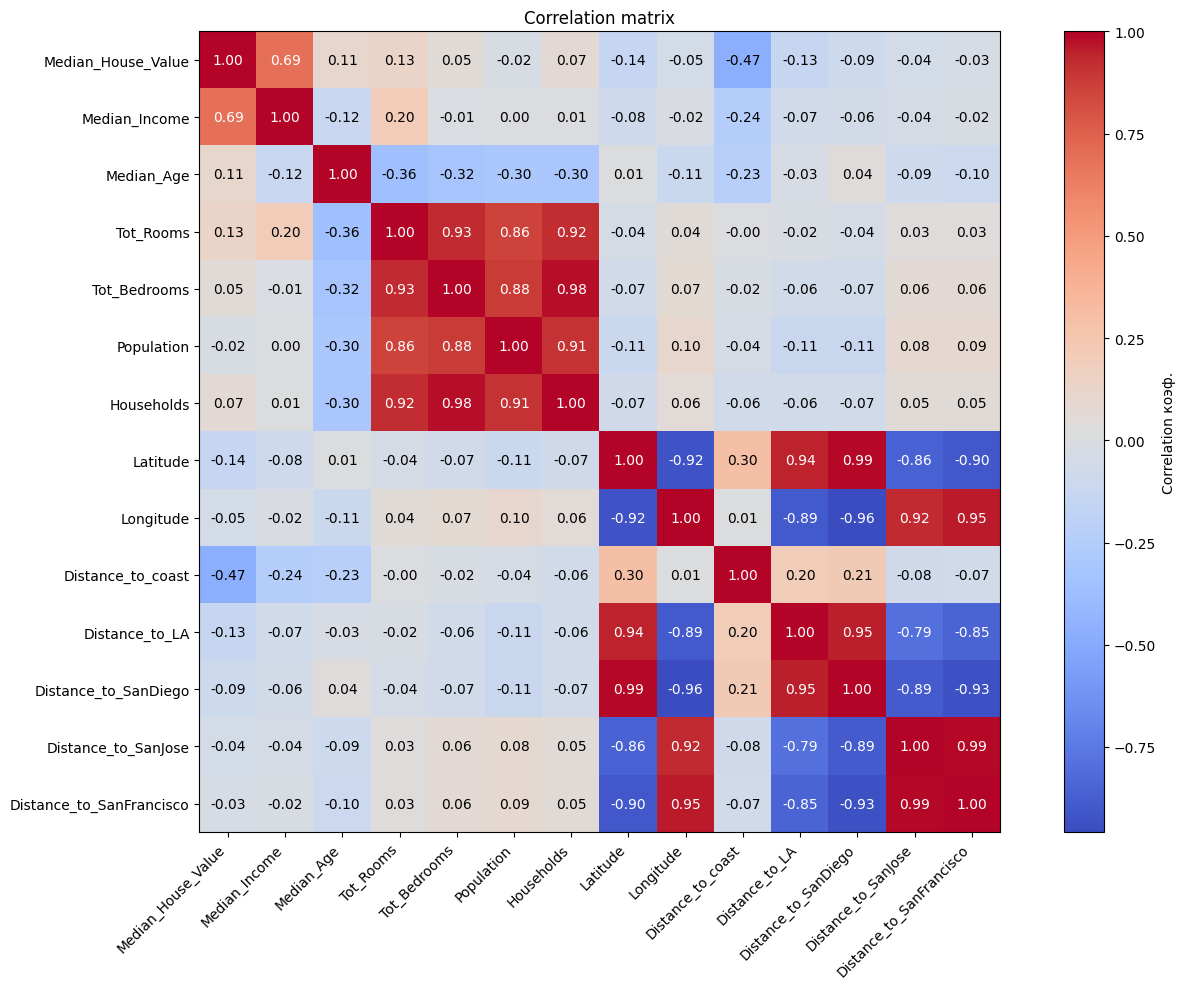

In [21]:
correlation_matrix(data_house_copy)

Удалить похожие колонки и оставить колонка из противоположное

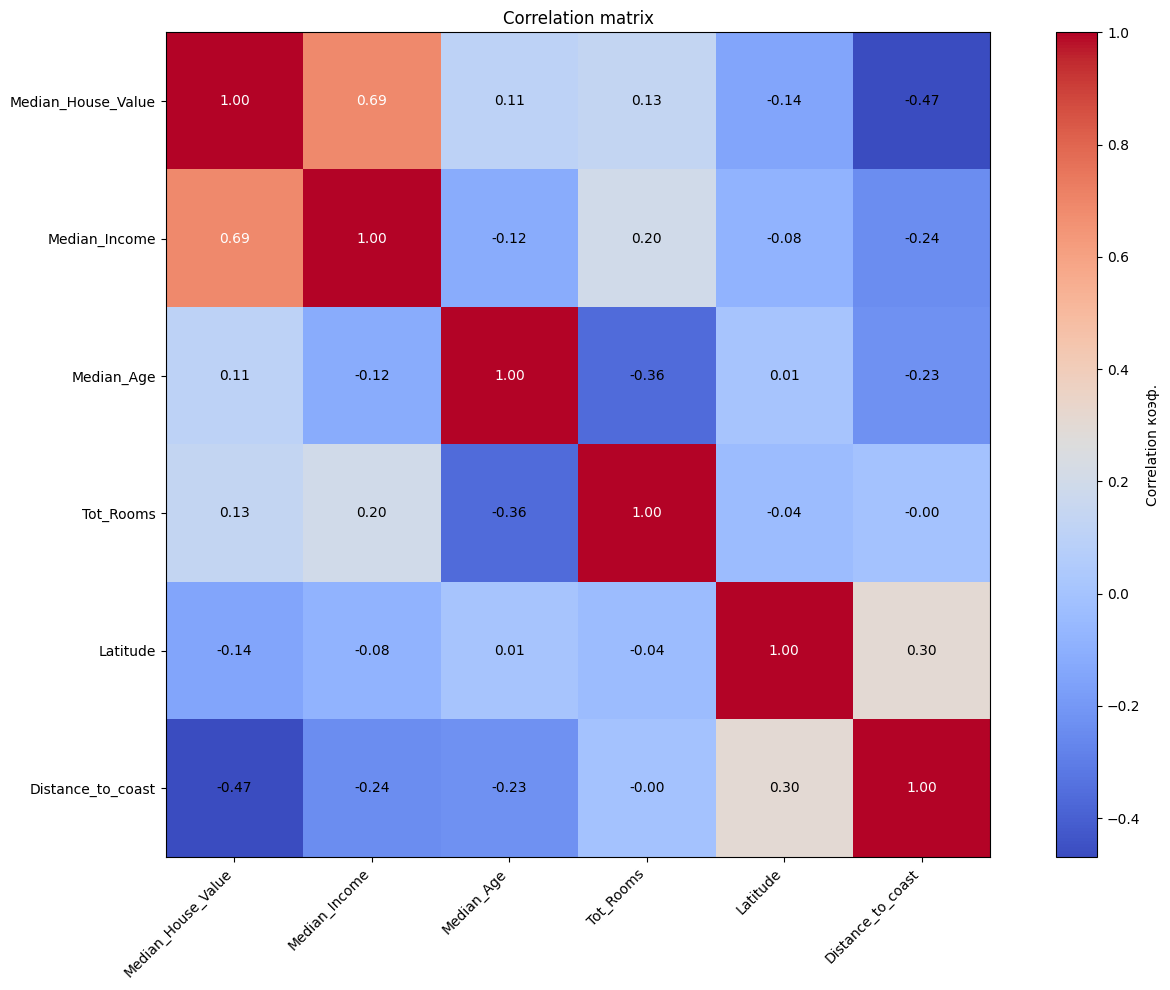

In [22]:
data_house_copy = data_house_copy.drop(columns=['Tot_Bedrooms', 'Population', 'Longitude', 'Households', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanFrancisco', 'Distance_to_SanJose'])

correlation_matrix(data_house_copy)

И для датасета Титаник тоже делаем самые.

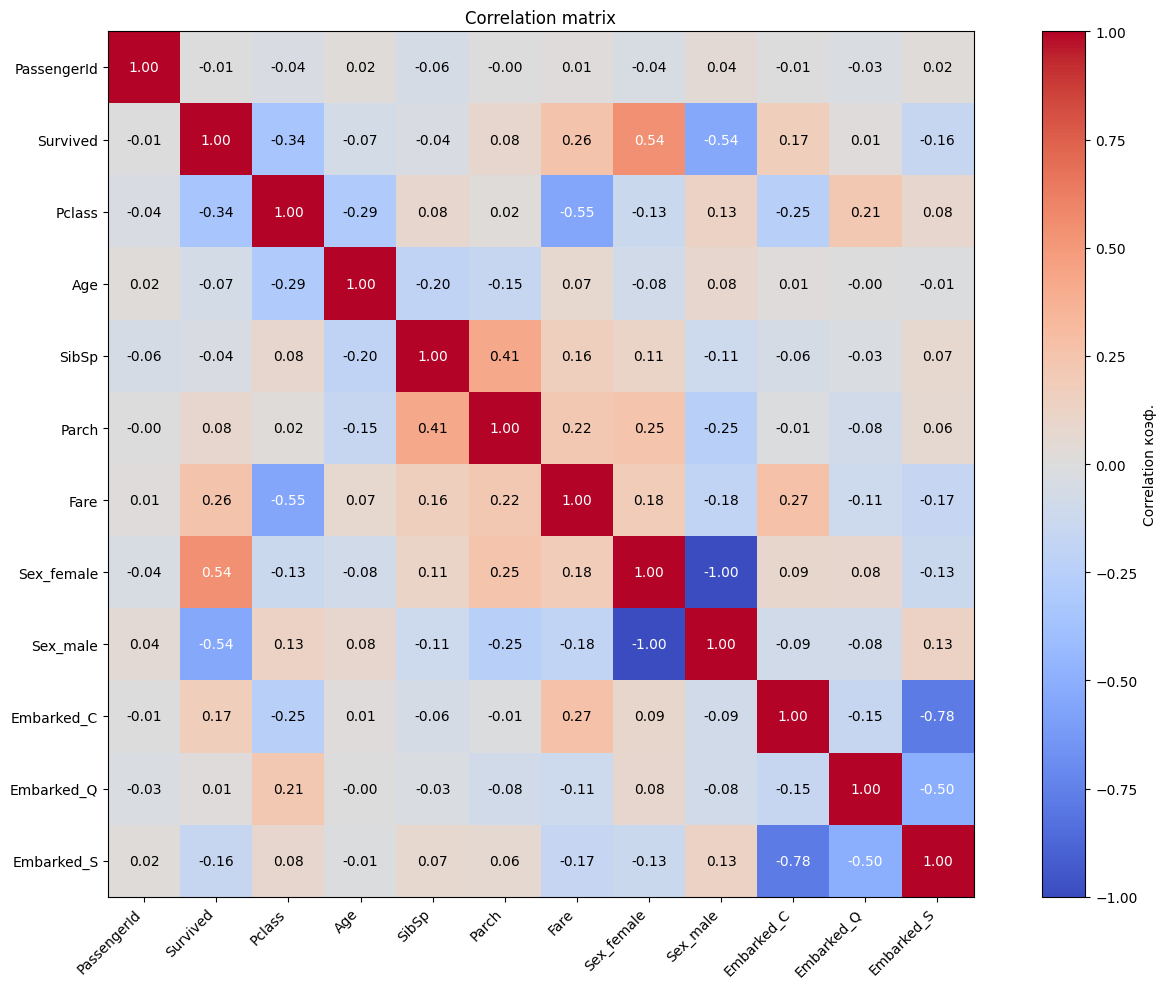

In [23]:
correlation_matrix(data_titanic_copy)

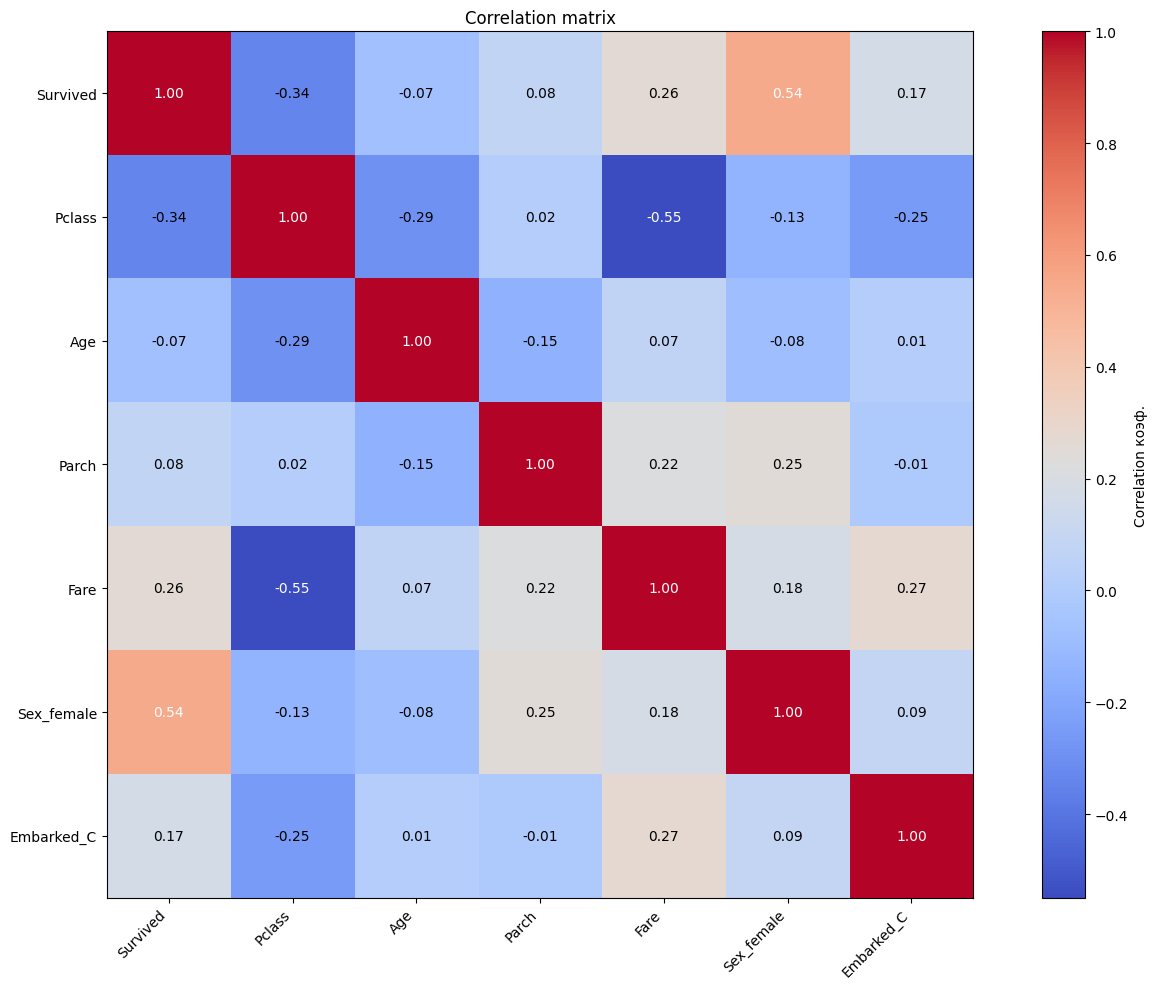

In [24]:
data_titanic_copy = data_titanic_copy.drop(columns=['PassengerId', 'SibSp', 'Sex_male', 'Embarked_Q', 'Embarked_S'])

correlation_matrix(data_titanic_copy)

In [25]:
data_house_copy.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Latitude,Distance_to_coast
0,452600.0,8.3252,41,880,37.88,9263.040773
1,358500.0,8.3014,21,7099,37.86,10225.733072
2,352100.0,7.2574,52,1467,37.85,8259.085109
3,341300.0,5.6431,52,1274,37.85,7768.086571
4,342200.0,3.8462,52,1627,37.85,7768.086571


In [26]:
data_titanic_copy.head()

,Survived,Pclass,Age,Parch,Fare,Sex_female,Embarked_C
0,0,3,2,0,7.2500,0,0
1,1,1,2,0,71.2833,1,1
2,1,3,2,0,7.9250,1,0
3,1,1,2,0,53.1000,1,0
4,0,3,2,0,8.0500,0,0


#### 2.5 Нормальзация данных

In [27]:
def normalize_to_range(df):
    normalized_set = df.copy()
    
    for column in normalized_set.columns:
        col_min = normalized_set[column].min()
        col_max = normalized_set[column].max()
        
        if col_max == col_min:
            normalized_set[column] = 0.0
        else:
            normalized_set[column] = 2 * (normalized_set[column] - col_min) / (col_max - col_min) - 1
    
    return normalized_set

In [28]:
data_house_copy = normalize_to_range(data_house_copy)
data_house_copy.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Latitude,Distance_to_coast
0,0.804533,0.079337,0.568627,-0.955339,0.134963,-0.945203
1,0.416493,0.076054,-0.215686,-0.638995,0.130712,-0.939433
2,0.390101,-0.067944,1.000000,-0.925479,0.128587,-0.951221
3,0.345566,-0.290603,1.000000,-0.935297,0.128587,-0.954164
4,0.349277,-0.538448,1.000000,-0.917341,0.128587,-0.954164


#### 2.6 Сохранение csv

Для того, чтобы легче работать с отработанными данными.

In [29]:
cols_X = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Latitude', 'Distance_to_coast']

X_house = data_house_copy[cols_X]
y_house = data_house_copy['Median_House_Value']

X_house.to_csv('input_house.csv', index=False)
y_house.to_csv('output_house.csv', index=False)

In [30]:
cols_X = ['Pclass', 'Age', 'Parch', 'Fare', 'Sex_female', 'Embarked_C']

X_titanic = data_titanic_copy[cols_X]
y_titanic = data_titanic_copy['Survived']

X_titanic.to_csv('input_titanic.csv', index=False)
y_titanic.to_csv('output_titanic.csv', index=False)

### 3.  class модели

In [ ]:
class model_linear:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=None, alpha=0.01, l1_ratio=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.metric_history = []

        self.regularization = regularization  # 正则化类型
        self.alpha = alpha                    # 正则化强度
        self.l1_ratio = l1_ratio              # 混合比例

    def calculate_metrics(self, y_true, y_pred):
        # MSE
        mse = torch.mean((y_true - y_pred) ** 2)
        
        # RMSE
        rmse = torch.sqrt(mse)
        
        # MAE
        mae = torch.mean(torch.abs(y_true - y_pred))
        
        # R²
        ss_total = torch.sum((y_true - torch.mean(y_true)) ** 2)
        ss_residual = torch.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        
        return {
            'MSE': mse.item(),
            'RMSE': rmse.item(),
            'MAE': mae.item(),
            'R2': r2.item()
        }

    def calculate_regularization_loss(self):
        if self.regularization is None:
            return 0.0
        
        if self.regularization == 'l1':
            return self.alpha * torch.sum(torch.abs(self.weights))
        
        elif self.regularization == 'l2':
            return (self.alpha / 2) * torch.sum(self.weights ** 2)
        
        elif self.regularization == 'elasticnet':
            l1_term = self.l1_ratio * torch.sum(torch.abs(self.weights))
            l2_term = (1 - self.l1_ratio) / 2 * torch.sum(self.weights ** 2)
            return self.alpha * (l1_term + l2_term)
        
    def calculate_regularization_gradient(self):
        if self.regularization is None:
            return 0.0
        
        if self.regularization == 'l1':
            return self.alpha * torch.sign(self.weights)
        
        elif self.regularization == 'l2':
            return self.alpha * self.weights
        
        elif self.regularization == 'elasticnet':
            l1_grad = self.l1_ratio * torch.sign(self.weights)
            l2_grad = (1 - self.l1_ratio) * self.weights
            return self.alpha * (l1_grad + l2_grad)


    def fit(self, X, y):
        num_samples, num_features = X.shape

        self.weights = torch.randn((num_features, 1), dtype=torch.float32) * 0.01
        self.bias = torch.zeros(1, dtype=torch.float32)

        for epoch in range(self.num_iterations):
            y_pred = torch.matmul(X, self.weights) + self.bias

            mse_loss = torch.mean((y_pred - y) ** 2)
            reg_loss = self.calculate_regularization_loss()
            
            total_loss = mse_loss + reg_loss
            self.loss_history.append(total_loss.item())

            dw = (2 / num_samples) * torch.matmul(X.T, (y_pred - y)) + self.calculate_regularization_gradient()
            db = (2 / num_samples) * torch.sum(y_pred - y)  # 偏置项通常不参与正则化

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            metrics = self.calculate_metrics(y, y_pred)
            self.metric_history.append(metrics)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss={total_loss.item():.4f}, R²={metrics['R2']:.4f}")

    def predict(self, X):
        return torch.matmul(X, self.weights) + self.bias
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        metrics = self.calculate_metrics(y, y_pred)
        return metrics, y_pred

In [4]:
class model_logic:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=None, alpha=0.01, l1_ratio=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.metric_history = []

        self.regularization = regularization
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    def calculate_metrics(self, y_true, y_pred_proba):
        y_pred_class = (y_pred_proba > 0.5).float()
        
        accuracy = torch.mean((y_pred_class == y_true).float())
        
        true_positives = torch.sum((y_pred_class == 1) & (y_true == 1))
        predicted_positives = torch.sum(y_pred_class == 1)
        precision = true_positives / (predicted_positives + 1e-8)
        
        actual_positives = torch.sum(y_true == 1)
        recall = true_positives / (actual_positives + 1e-8)
        
        f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
        
        loss = self.binary_cross_entropy(y_true, y_pred_proba)
        
        return {
            'Accuracy': accuracy.item(),
            'Precision': precision.item(),
            'Recall': recall.item(),
            'F1': f1.item(),
            'Loss': loss.item()
        }
    
    def sigmoid(self, z):
        z = torch.clamp(z, -10, 10)
        return 1 / (1 + torch.exp(-z))
    
    def binary_cross_entropy(self, y_true, y_pred_proba):
        epsilon = 1e-8
        y_pred_proba = torch.clamp(y_pred_proba, epsilon, 1 - epsilon)
        return -torch.mean(y_true * torch.log(y_pred_proba) + (1 - y_true) * torch.log(1 - y_pred_proba))
    
    def _calculate_regularization_loss(self):
        if self.regularization is None:
            return 0.0
        
        if self.regularization == 'l1':
            return self.alpha * torch.sum(torch.abs(self.weights))
        
        elif self.regularization == 'l2':
            return (self.alpha / 2) * torch.sum(self.weights **2)
        
        elif self.regularization == 'elasticnet':
            l1_term = self.l1_ratio * torch.sum(torch.abs(self.weights))
            l2_term = (1 - self.l1_ratio) / 2 * torch.sum(self.weights** 2)
            return self.alpha * (l1_term + l2_term)
        
    def _calculate_regularization_gradient(self):
        if self.regularization is None:
            return 0.0
        
        if self.regularization == 'l1':
            return self.alpha * torch.sign(self.weights)
        
        elif self.regularization == 'l2':
            return self.alpha * self.weights
        
        elif self.regularization == 'elasticnet':
            l1_grad = self.l1_ratio * torch.sign(self.weights)
            l2_grad = (1 - self.l1_ratio) * self.weights
            return self.alpha * (l1_grad + l2_grad)
    
    # def fit(self, X, y):
    #     num_samples, num_features = X.shape

    #     self.weights = torch.randn((num_features, 1), dtype=torch.float32) * 0.01
    #     self.bias = torch.zeros(1, dtype=torch.float32)

    #     for epoch in range(self.num_iterations):
    #         linear_output = torch.matmul(X, self.weights) + self.bias
    #         y_pred_proba = self.sigmoid(linear_output)

    #         loss = self.binary_cross_entropy(y, y_pred_proba)
    #         self.loss_history.append(loss.item())

    #         error = y_pred_proba - y

    #         dw = (1 / num_samples) * torch.matmul(X.T, error)
    #         db = (1 / num_samples) * torch.sum(error)

    #         self.weights -= self.learning_rate * dw
    #         self.bias -= self.learning_rate * db

    #         if epoch % 100 == 0:
    #             metrics = self.calculate_metrics(y, y_pred_proba)
    #             self.metric_history.append(metrics)
    #             print(f"Epoch {epoch}: Loss={loss.item()}, Accuracy={metrics['Accuracy']}, F1={metrics['F1']}")

    def fit(self, X, y):
        num_samples, num_features = X.shape

        self.weights = torch.randn((num_features, 1), dtype=torch.float32) * 0.01
        self.bias = torch.zeros(1, dtype=torch.float32)

        for epoch in range(self.num_iterations):
            linear_output = torch.matmul(X, self.weights) + self.bias
            y_pred_proba = self.sigmoid(linear_output)

            ce_loss = self.binary_cross_entropy(y, y_pred_proba)
            reg_loss = self._calculate_regularization_loss()
            total_loss = ce_loss + reg_loss
            self.loss_history.append(total_loss.item())

            error = y_pred_proba - y
            dw = (1 / num_samples) * torch.matmul(X.T, error) + self._calculate_regularization_gradient()
            db = (1 / num_samples) * torch.sum(error)  # 偏置项通常不正则化

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if epoch % 100 == 0:
                metrics = self.calculate_metrics(y, y_pred_proba)
                self.metric_history.append(metrics)
                print(f"Epoch {epoch}: Loss={total_loss.item():.4f}, Accuracy={metrics['Accuracy']:.4f}, F1={metrics['F1']:.4f}")


    def predict_proba(self, X):
        return self.sigmoid(torch.matmul(X, self.weights) + self.bias)
    
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities > threshold).float()
    
    def evaluate(self, X, y):
        y_pred_proba = self.predict(X)
        metrics = self.calculate_metrics(y, y_pred_proba)
        return metrics
    
    def plot_f1_accuracy(self):
        f1_scores = [metrics['F1'] for metrics in self.metric_history]
        accuracies = [metrics['Accuracy'] for metrics in self.metric_history]
        
        epochs = [i * 100 for i in range(len(self.metric_history))]
        
        plt.figure(figsize=(10, 6))
        
        plt.plot(epochs, f1_scores, 'orange', label='F1 Score')
        plt.plot(epochs, accuracies, 'purple', label='Accuracy')
        
        plt.xlabel('Epochs')
        plt.ylabel('Value')
        plt.title('F1 и Асс')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.ylim(0, 1.05)
        plt.show()

### 4. Обучение модель

#### Датасет домы Калифония

In [45]:
X_house = pd.read_csv('input_house.csv').values
y_house = pd.read_csv('output_house.csv').values

X_house = torch.tensor(X_house, dtype=torch.float32)
y_house = torch.tensor(y_house, dtype=torch.float32)

train_size = int(0.8 * len(X_house))
X_train_house, X_test_house = X_house[:train_size], X_house[train_size:]
y_train_house, y_test_house = y_house[:train_size], y_house[train_size:]

model = model_linear(0.01, 1000)

model.fit(X_train_house, y_train_house)

losses = model.loss_history

metric = model.metric_history

Epoch 0: Loss=0.2831, R²=-0.2919
Epoch 100: Loss=0.1809, R²=0.1745
Epoch 200: Loss=0.1542, R²=0.2962
Epoch 300: Loss=0.1371, R²=0.3741
Epoch 400: Loss=0.1257, R²=0.4263
Epoch 500: Loss=0.1178, R²=0.4623
Epoch 600: Loss=0.1122, R²=0.4878
Epoch 700: Loss=0.1082, R²=0.5062
Epoch 800: Loss=0.1052, R²=0.5198
Epoch 900: Loss=0.1030, R²=0.5298


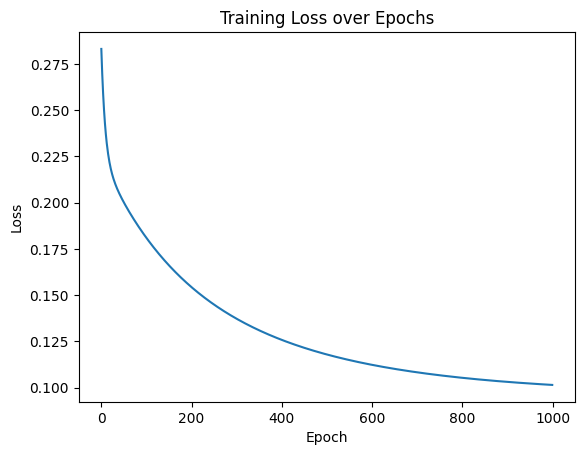

In [46]:
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### 5. Оценка модели

In [47]:
metrics_train, y_train_pred = model.evaluate(X_train_house, y_train_house)

metrics_pred, y_test_pred = model.evaluate(X_test_house, y_test_house)

print("Метрики обучания:")
print(f"MSE: {metrics_train['MSE']}")
print(f"RMSE: {metrics_train['RMSE']}")
print(f"MAE: {metrics_train['MAE']}")
print(f"R²: {metrics_train['R2']}")

Метрики обучания:
MSE: 0.10138370096683502
RMSE: 0.3184080719947815
MAE: 0.23755282163619995
R²: 0.5373532772064209


In [48]:
print("Метрики тестирование:")
print(f"MSE: {metrics_pred['MSE']}")
print(f"RMSE: {metrics_pred['RMSE']}")
print(f"MAE: {metrics_pred['MAE']}")
print(f"R²: {metrics_pred['R2']}")

Метрики тестирование:
MSE: 0.10398834198713303
RMSE: 0.3224722445011139
MAE: 0.23276403546333313
R²: 0.58033287525177


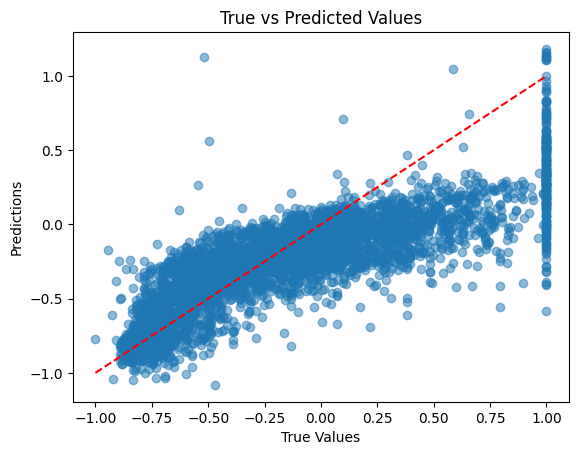

In [49]:
plt.scatter(y_test_house.detach().numpy(), y_test_pred.detach().numpy(), alpha=0.5)
plt.plot([y_test_house.min(), y_test_house.max()], [y_test_house.min(), y_test_house.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

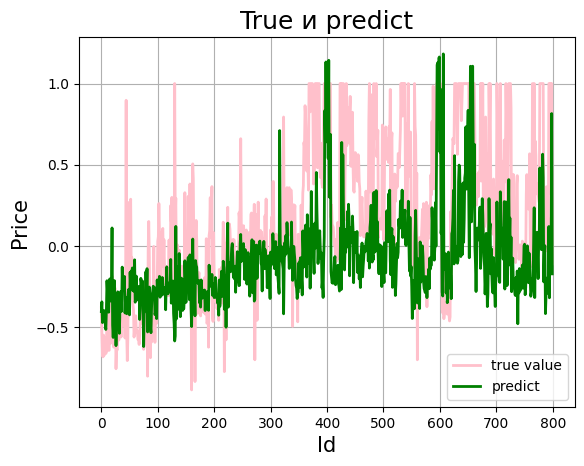

In [50]:
n_points = 800
t = np.arange(n_points)

plt.figure(facecolor='w')
plt.plot(t, y_test_house[:n_points], 'pink', lw=2, label=u'true value')
plt.plot(t, y_test_pred[:n_points], 'green', lw=2, label=u'predict')
plt.legend(loc = 'best')
plt.title('True и predict', fontsize=18)
plt.xlabel('Id', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.grid()
plt.show()

#### Датасет Титаник

In [14]:
X_titanic = pd.read_csv('input_titanic.csv').values
y_titanic = pd.read_csv('output_titanic.csv').values

X_titanic = torch.tensor(X_titanic, dtype=torch.float32)
y_titanic = torch.tensor(y_titanic, dtype=torch.float32)

train_size = int(0.8 * len(X_titanic))
X_train_titanic, X_test_titanic = X_titanic[:train_size], X_titanic[train_size:]
y_train_titanic, y_test_titanic = y_titanic[:train_size], y_titanic[train_size:]

model = model_logic(0.01, 1000)

model.fit(X_train_titanic, y_train_titanic)

Epoch 0: Loss=0.6976, Accuracy=0.3904, F1=0.5616
Epoch 100: Loss=0.6179, Accuracy=0.6812, F1=0.3947
Epoch 200: Loss=0.8138, Accuracy=0.6376, F1=0.5552
Epoch 300: Loss=0.8103, Accuracy=0.6475, F1=0.5665
Epoch 400: Loss=0.7955, Accuracy=0.6489, F1=0.5675
Epoch 500: Loss=0.7821, Accuracy=0.6601, F1=0.5813
Epoch 600: Loss=0.7656, Accuracy=0.6699, F1=0.5899
Epoch 700: Loss=0.7488, Accuracy=0.6868, F1=0.6175
Epoch 800: Loss=0.7323, Accuracy=0.6952, F1=0.6278
Epoch 900: Loss=0.7145, Accuracy=0.6994, F1=0.6310


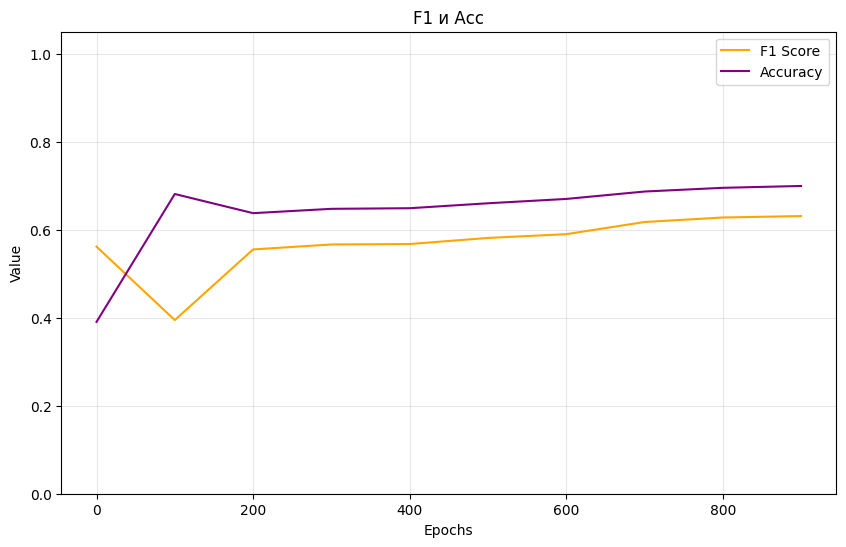

In [15]:
model.plot_f1_accuracy()

## Lab 2 - Задание 1

In [ ]:
model_L = model_linear(0.01, 1000)
model_l1 = model_linear(0.01, 1000, regularization='l1', alpha=0.01)
model_l2 = model_linear(0.01, 1000, regularization='l2', alpha=0.01)
model_elastic = model_linear(0.01, 1000, regularization='elasticnet', alpha=0.01, l1_ratio=0.5)

model_L.fit(X_train_house, y_train_house)
model_l1.fit(X_train_house, y_train_house)
model_l2.fit(X_train_house, y_train_house)
model_elastic.fit(X_train_house, y_train_house)

metrics_L, _ = model_L.evaluate(X_test_house, y_test_house)
metrics_l1, _ = model_l1.evaluate(X_test_house, y_test_house)
metrics_l2, _ = model_l2.evaluate(X_test_house, y_test_house)
metrics_elastic, _ = model_elastic.evaluate(X_test_house, y_test_house)

Epoch 0: Loss=0.2717, R²=-0.2398
Epoch 100: Loss=0.1810, R²=0.1739
Epoch 200: Loss=0.1544, R²=0.2956
Epoch 300: Loss=0.1372, R²=0.3737
Epoch 400: Loss=0.1258, R²=0.4260
Epoch 500: Loss=0.1179, R²=0.4621
Epoch 600: Loss=0.1122, R²=0.4878
Epoch 700: Loss=0.1082, R²=0.5063
Epoch 800: Loss=0.1052, R²=0.5199
Epoch 900: Loss=0.1030, R²=0.5300
Epoch 0: Loss=0.2799, R²=-0.2755
Epoch 100: Loss=0.1862, R²=0.1663
Epoch 200: Loss=0.1640, R²=0.2800
Epoch 300: Loss=0.1494, R²=0.3556
Epoch 400: Loss=0.1395, R²=0.4077
Epoch 500: Loss=0.1326, R²=0.4446
Epoch 600: Loss=0.1276, R²=0.4714
Epoch 700: Loss=0.1240, R²=0.4912
Epoch 800: Loss=0.1213, R²=0.5060
Epoch 900: Loss=0.1193, R²=0.5172
Epoch 0: Loss=0.2680, R²=-0.2231
Epoch 100: Loss=0.1798, R²=0.1807
Epoch 200: Loss=0.1548, R²=0.2968
Epoch 300: Loss=0.1389, R²=0.3718
Epoch 400: Loss=0.1284, R²=0.4223
Epoch 500: Loss=0.1212, R²=0.4575
Epoch 600: Loss=0.1162, R²=0.4825
Epoch 700: Loss=0.1126, R²=0.5007
Epoch 800: Loss=0.1101, R²=0.5142
Epoch 900: Loss=0

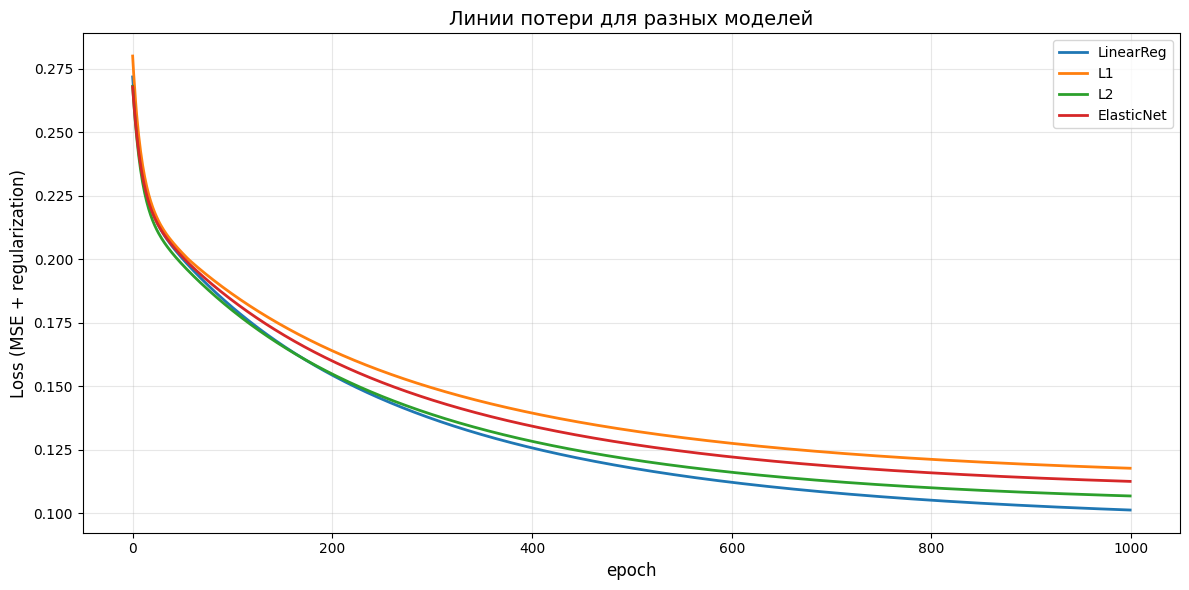

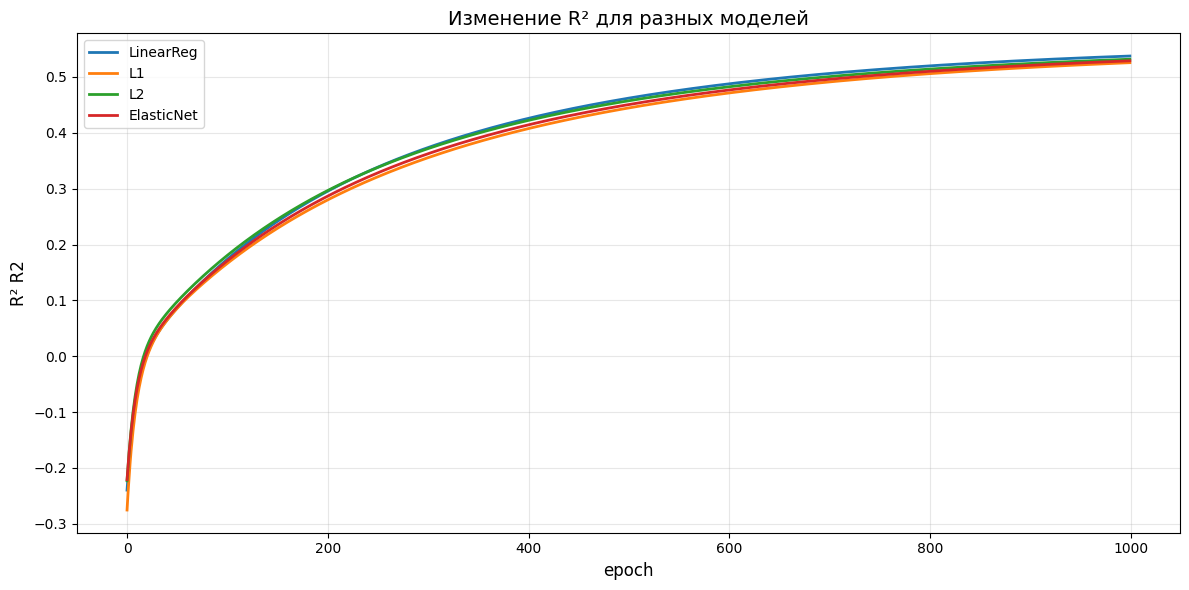

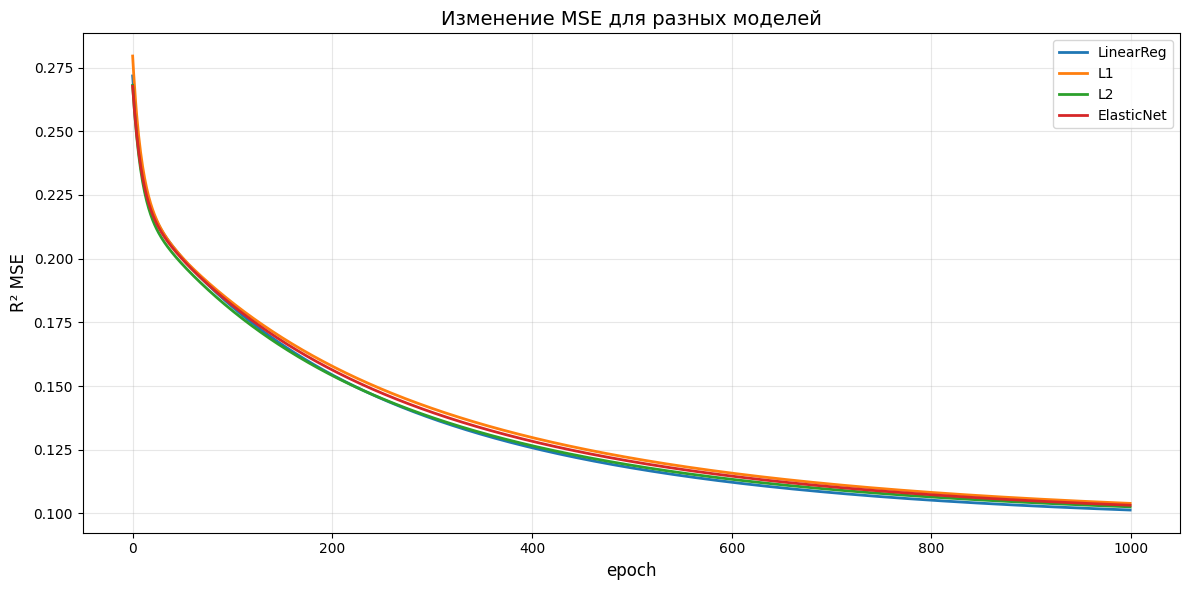

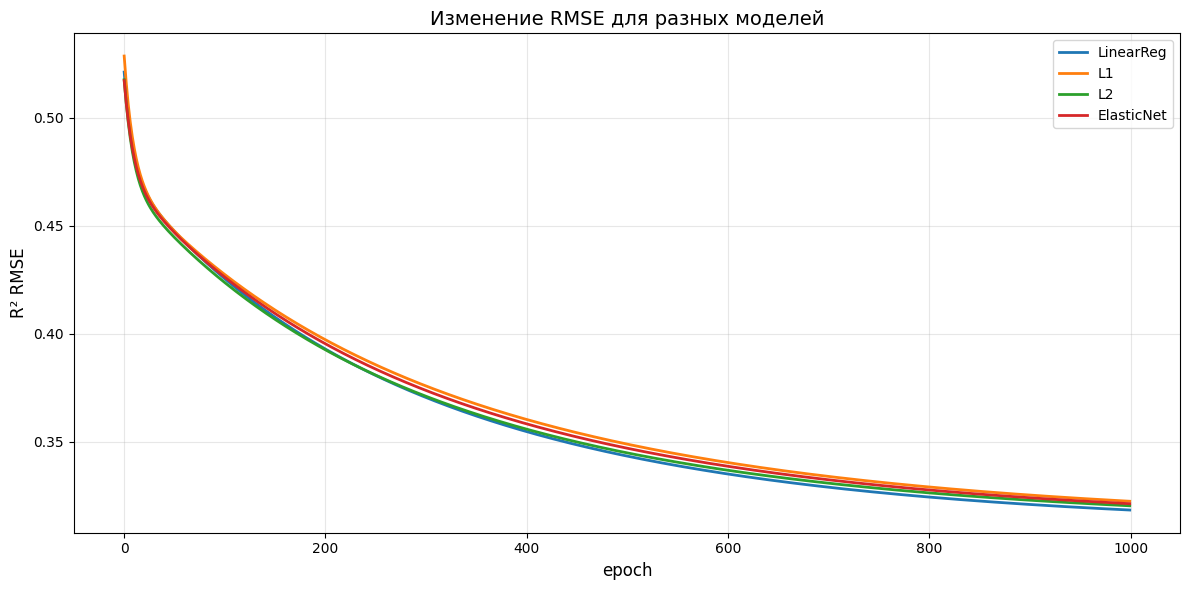

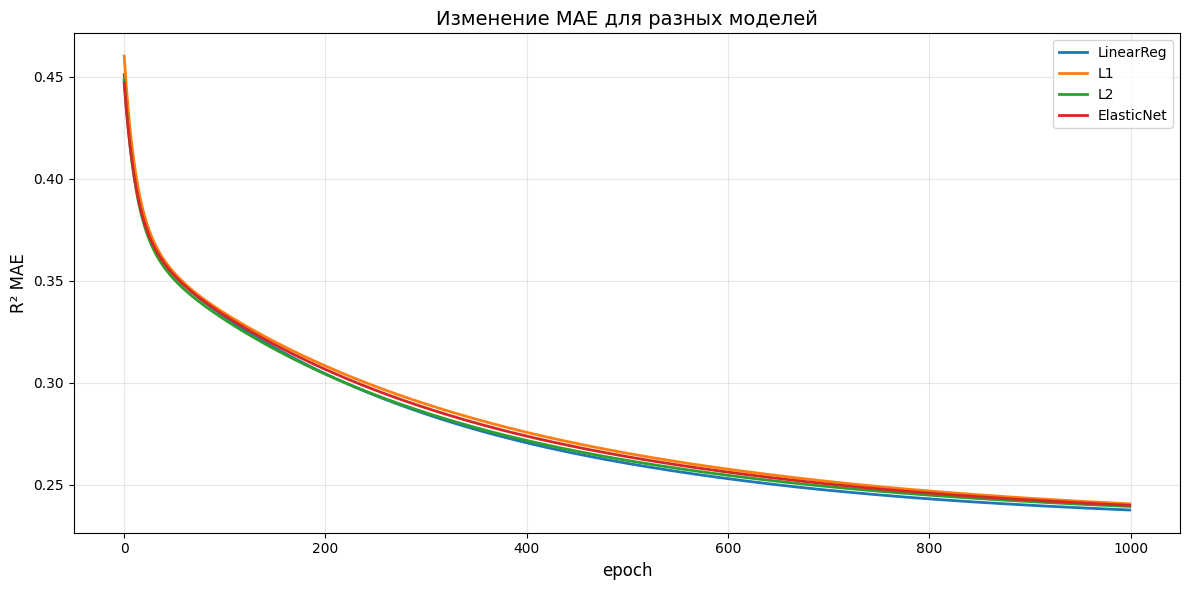

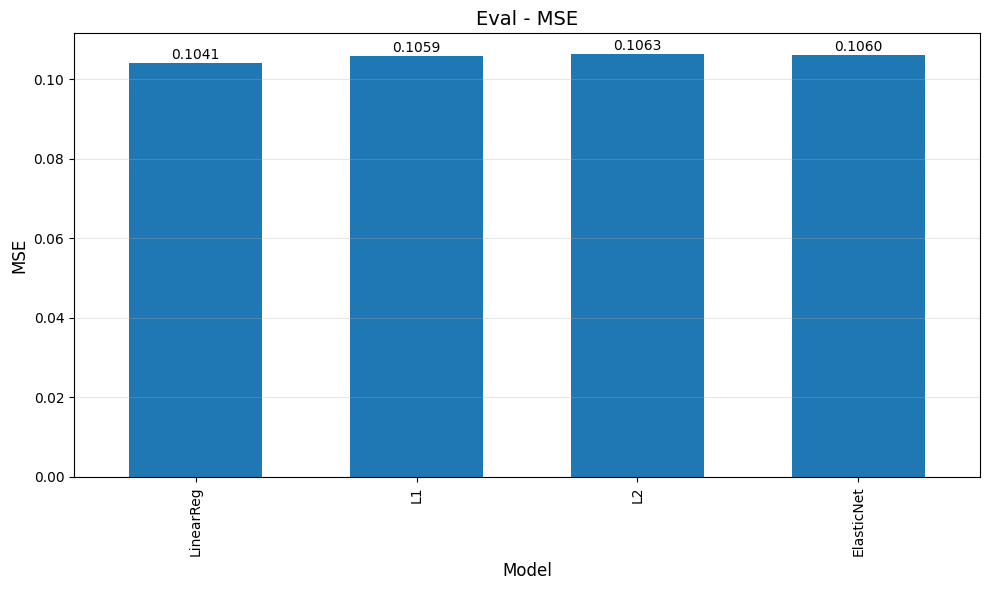

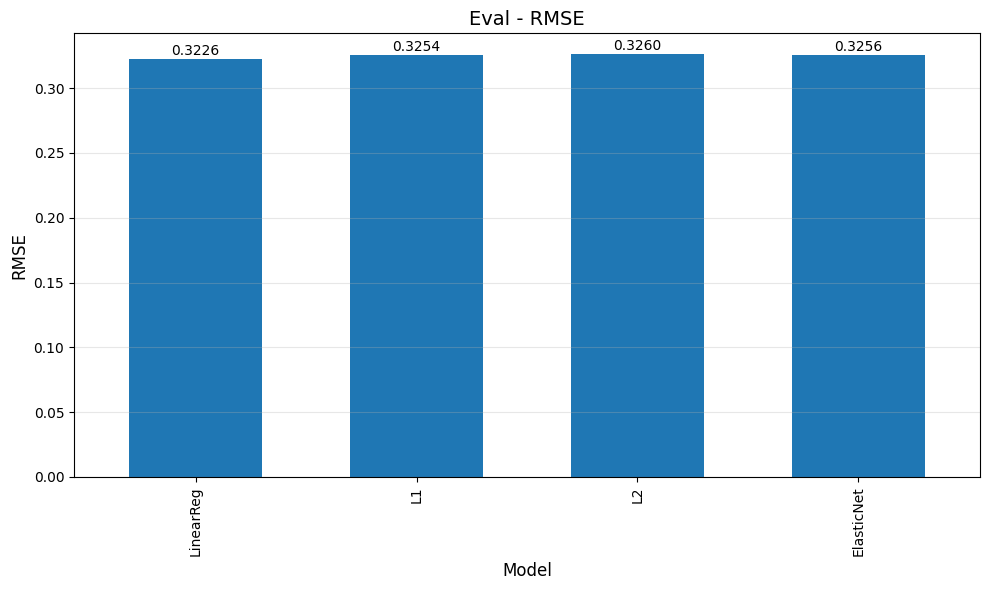

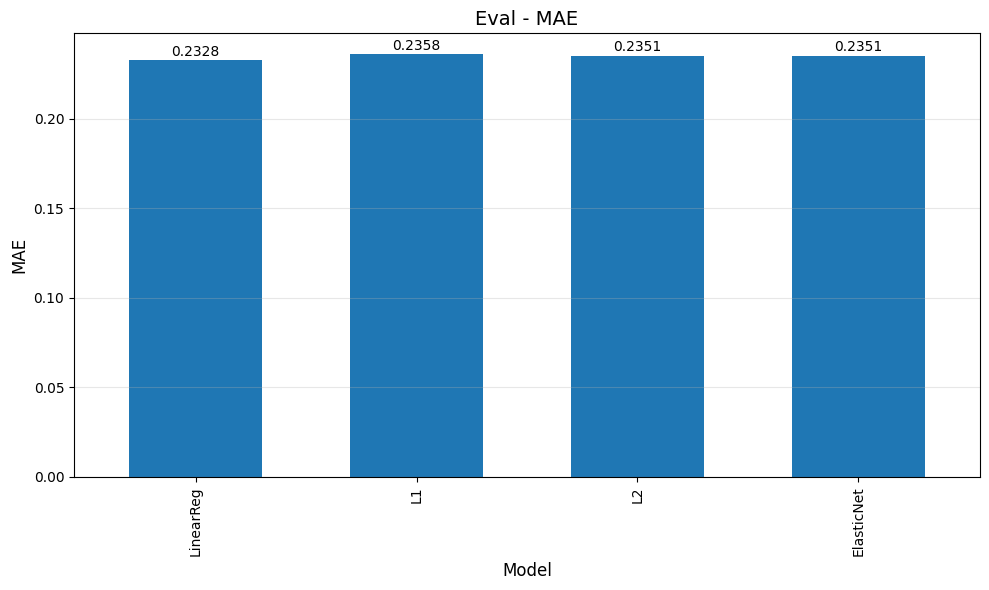

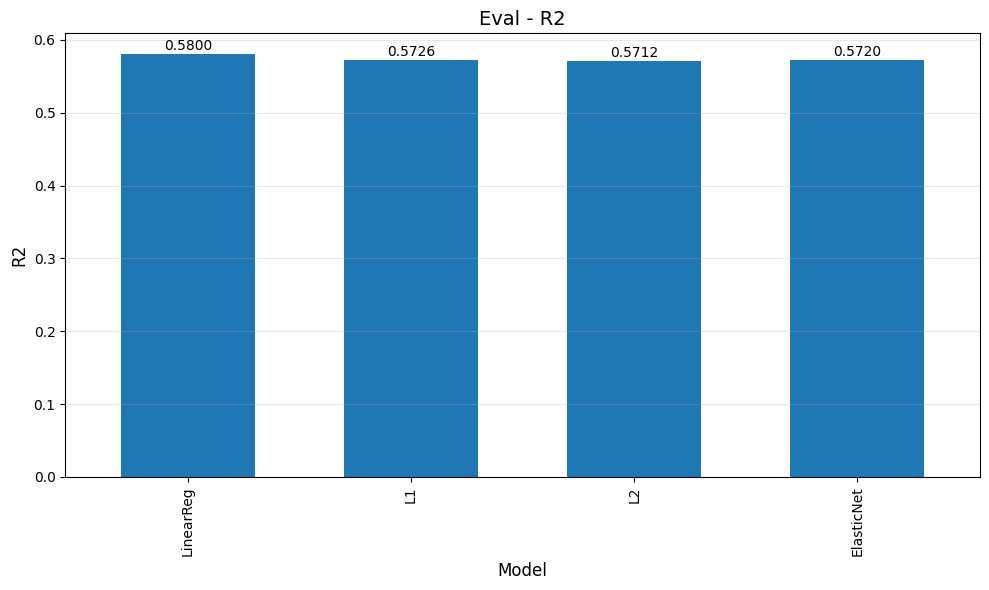

In [74]:
def plot_training_loss(models, title="Линии потери для разных моделей"):
    plt.figure(figsize=(12, 6))
    
    for name, model in models.items():
        plt.plot(
            range(len(model.loss_history)), 
            model.loss_history, 
            label=name,
            linewidth=2
        )
    
    plt.xlabel("epoch", fontsize=12)
    plt.ylabel("Loss (MSE + regularization)", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_metric_history(models, metric, title):
    plt.figure(figsize=(12, 6))
    
    for name, model in models.items():
        metric_values = [mh[metric] for mh in model.metric_history]
        plt.plot(
            range(len(metric_values)), 
            metric_values, 
            label=name,
            linewidth=2
        )
    
    plt.xlabel("epoch", fontsize=12)
    plt.ylabel(f"R² {metric}", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_final_metrics(metrics_dict, title="Eval"):
    metrics_df = pd.DataFrame(metrics_dict).T
    
    for metric in metrics_df.columns:
        plt.figure(figsize=(10, 6))
        ax = metrics_df[metric].plot(kind='bar', width=0.6)
        
        for i, v in enumerate(metrics_df[metric]):
            ax.text(i, v + (max(metrics_df[metric])*0.01), 
                    f"{v:.4f}", ha='center', fontsize=10)
        
        plt.xlabel("Model", fontsize=12)
        plt.ylabel(metric, fontsize=12)
        plt.title(f"{title} - {metric}", fontsize=14)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()


models = {
    "LinearReg": model_L,
    "L1": model_l1,
    "L2": model_l2,
    "ElasticNet": model_elastic
}

metrics_dict = {
    "LinearReg": metrics_L,
    "L1": metrics_l1,
    "L2": metrics_l2,
    "ElasticNet": metrics_elastic
}
    
plot_training_loss(models)
    
plot_metric_history(models, metric="R2", title="Изменение R² для разных моделей")
plot_metric_history(models, metric="MSE", title="Изменение MSE для разных моделей")
plot_metric_history(models, metric="RMSE", title="Изменение RMSE для разных моделей")
plot_metric_history(models, metric="MAE", title="Изменение MAE для разных моделей")

plot_final_metrics(metrics_dict)


In [ ]:
model_L = model_logic(0.01, 1000)
model_l1 = model_logic(0.01, 1000, regularization='l1', alpha=0.01)
model_l2 = model_logic(0.01, 1000, regularization='l2', alpha=0.01)
model_elastic = model_logic(0.01, 1000, regularization='elasticnet', alpha=0.01, l1_ratio=0.5)

model_L.fit(X_train_titanic, y_train_titanic)
model_l1.fit(X_train_titanic, y_train_titanic)
model_l2.fit(X_train_titanic, y_train_titanic)
model_elastic.fit(X_train_titanic, y_train_titanic)

metrics_L = model_L.evaluate(X_test_titanic, y_test_titanic)
metrics_l1 = model_l1.evaluate(X_test_titanic, y_test_titanic)
metrics_l2 = model_l2.evaluate(X_test_titanic, y_test_titanic)
metrics_elastic = model_elastic.evaluate(X_test_titanic, y_test_titanic)

Epoch 0: Loss=0.7001, Accuracy=0.6096, F1=0.0000
Epoch 100: Loss=0.6198, Accuracy=0.6685, F1=0.4244
Epoch 200: Loss=0.6154, Accuracy=0.6798, F1=0.4300
Epoch 300: Loss=0.6107, Accuracy=0.6812, F1=0.4339
Epoch 400: Loss=0.6021, Accuracy=0.6854, F1=0.4428
Epoch 500: Loss=0.5926, Accuracy=0.6840, F1=0.4389
Epoch 600: Loss=0.5833, Accuracy=0.6910, F1=0.4500
Epoch 700: Loss=0.5745, Accuracy=0.6938, F1=0.4550
Epoch 800: Loss=0.5662, Accuracy=0.6980, F1=0.4638
Epoch 900: Loss=0.5583, Accuracy=0.7121, F1=0.4913
Epoch 0: Loss=0.7304, Accuracy=0.5969, F1=0.0069
Epoch 100: Loss=0.9062, Accuracy=0.6376, F1=0.5812
Epoch 200: Loss=0.6265, Accuracy=0.6770, F1=0.4221
Epoch 300: Loss=0.6227, Accuracy=0.6812, F1=0.4339
Epoch 400: Loss=0.6158, Accuracy=0.6826, F1=0.4350
Epoch 500: Loss=0.6082, Accuracy=0.6840, F1=0.4389
Epoch 600: Loss=0.6008, Accuracy=0.6868, F1=0.4411
Epoch 700: Loss=0.5937, Accuracy=0.6910, F1=0.4500
Epoch 800: Loss=0.5871, Accuracy=0.6952, F1=0.4615
Epoch 900: Loss=0.5809, Accuracy=0.

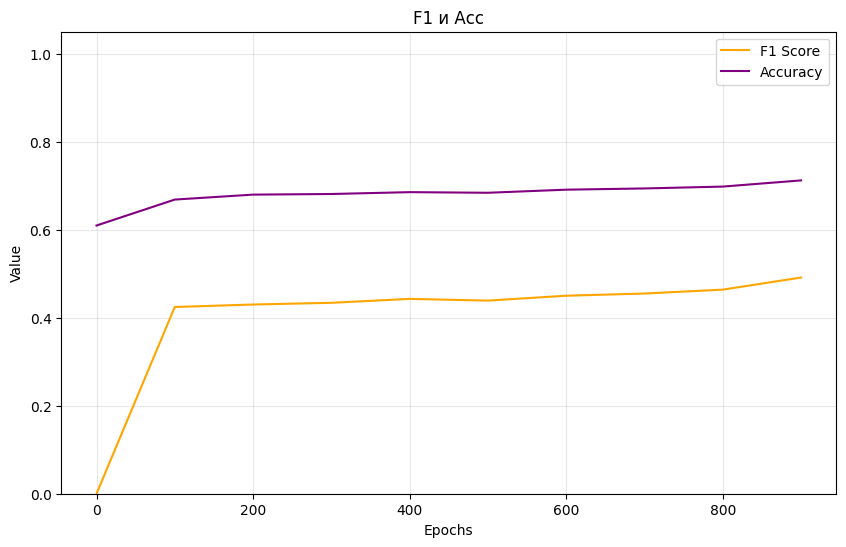

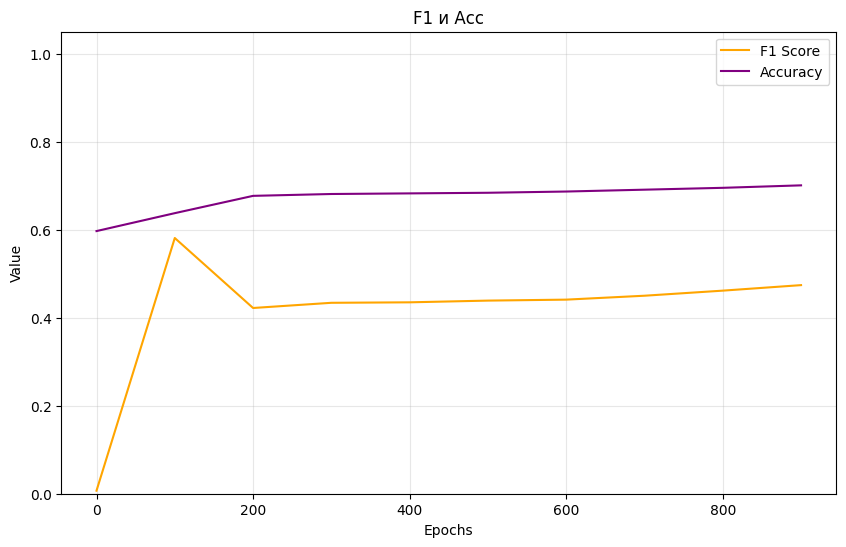

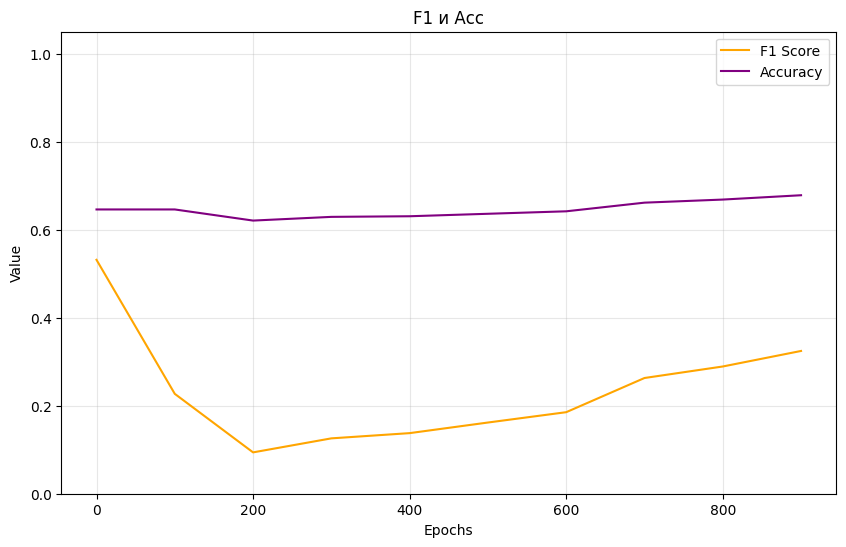

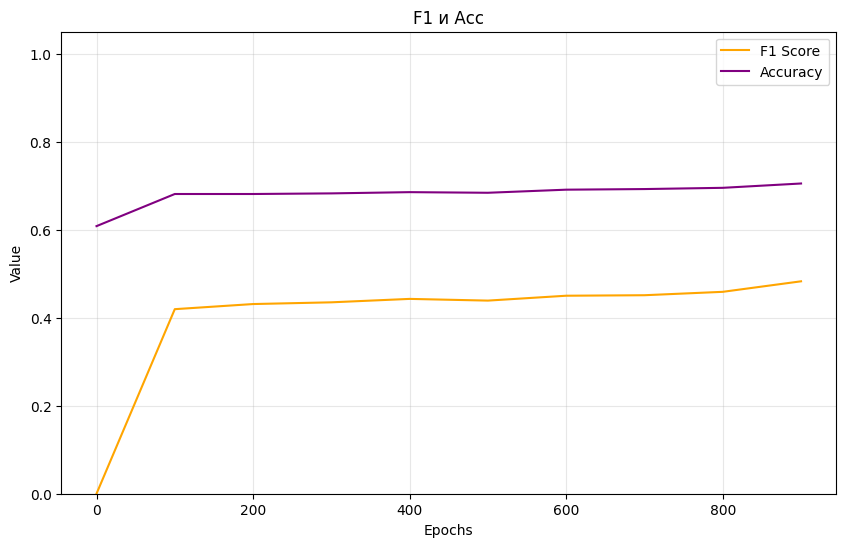

In [21]:
model_L.plot_f1_accuracy()
model_l1.plot_f1_accuracy()
model_l2.plot_f1_accuracy()
model_elastic.plot_f1_accuracy()